H1 =  [[-1.06447664e-03 -3.48085110e-04  6.91592871e-01]
 [-1.14977496e-03 -2.88935790e-04  7.22284694e-01]
 [-1.89925949e-06 -5.30536239e-07  1.20926249e-03]]


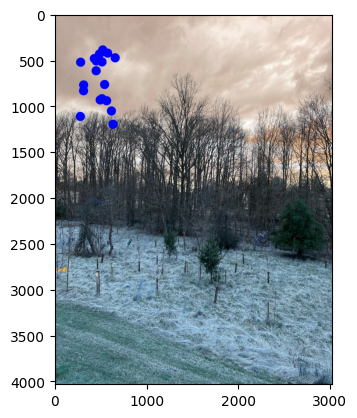

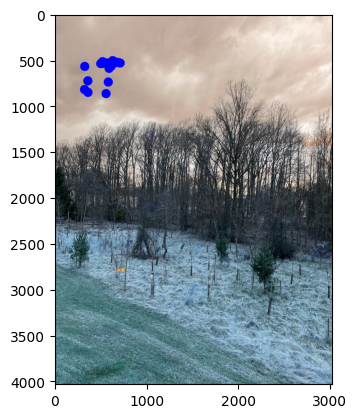

In [32]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Read Images

img1 = cv.imread('image_1.jpg')
img2 = cv.imread('image_2.jpg')
img3 = cv.imread('image_3.jpg')
img4 = cv.imread('image_4.jpg')

def get_images(image1,image2):

    image1_r = cv.resize(image1, (int(image1.shape[1]*0.3),int(image1.shape[0]*0.3)), interpolation = cv.INTER_AREA)
    image2_r = cv.resize(image2, (int(image2.shape[1]*0.3),int(image2.shape[0]*0.3)), interpolation = cv.INTER_AREA)

    image1_r = cv.cvtColor(image1_r, cv.COLOR_BGR2RGB)
    image2_r = cv.cvtColor(image2_r, cv.COLOR_BGR2RGB)

    # covert to grayscale
    # gray1 = cv.cvtColor(image1_r, cv.COLOR_RGB2GRAY)
    # gray2 = cv.cvtColor(image2_r, cv.COLOR_RGB2GRAY)

    # create SIFT feature extractor
    sift = cv.xfeatures2d.SIFT_create()

    keypoints1, descriptors1 = sift.detectAndCompute(image1_r, None)
    keypoints2, descriptors2 = sift.detectAndCompute(image2_r, None)

    bf = cv.BFMatcher(cv.NORM_L2, crossCheck=True)
    match = bf.match(descriptors1, descriptors2)

    # Sort by distance
    match = sorted(match, key=lambda x:x.distance)
    
    return match, keypoints1, keypoints2 


def calculate_homography(match,keypoints_1,keypoints_2,image1,image2):
    keypointsQ = np.float64([kp.pt for kp in keypoints_1])
    keypointsT = np.float64([kt.pt for kt in keypoints_2])
    query_points = np.float64([keypointsQ[m.queryIdx] for m in match])
    train_points = np.float64([keypointsT[m.queryIdx] for m in match])

    A = np.zeros((2,9))
    for i in range(20):
        x1,y1 = train_points[i]
        x2,y2 = query_points[i]
        a_i = np.array([[x1, y1, 1, 0, 0, 0, -x2*x1, -x2*y1, -x2],
                        [0, 0, 0, x1, y1, 1, -y2*x1, -y2*y1, -y2]])
        A = np.vstack((A,a_i))
        draw = cv.circle(image2, (int(x1),int(y1)), radius=0, color=(0, 0, 255), thickness=100)
        draw1 = cv.circle(image1, (int(x2),int(y2)), radius=0, color=(0, 0, 255), thickness=100)
        # cv.circle(image2, (x1,y1), radius=0, color=(0, 0, 255), thickness=10)
        
    A = A[2:]
    eigenvalues, eigenvectors = np.linalg.eig(np.dot(A.T,A))
    eigenvalue_idx = np.argmin(eigenvalues)
    homography = eigenvectors[:,eigenvalue_idx]
    homography = np.array(homography,dtype=np.float64).reshape(3,3)

    return homography, draw, draw1



match1_2, keypoints1, keypoints2 = get_images(img1,img2)
H1, draw,draw1 = calculate_homography(match1_2, keypoints1, keypoints2, img1,img2)


img1 = cv.resize(img1, (int(img1.shape[1]*0.3),int(img1.shape[0]*0.3)), interpolation = cv.INTER_AREA)
img2 = cv.resize(img1, (int(img2.shape[1]*0.3),int(img2.shape[0]*0.3)), interpolation = cv.INTER_AREA)
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

stich1 = cv.warpPerspective(img2,H1,((img1.shape[1]+img2.shape[1]),max(img1.shape[0],img2.shape[0])))
stich1[0:img1.shape[0],0:img1.shape[1]] = img1
# stich1 = stich1[:,:1145]
print('H1 = ',H1)
plt.imshow(draw)
plt.show()
plt.imshow(draw1)
plt.show()



H2 =  [[-3.32033196e-03 -2.61678141e-04  5.55924239e-01]
 [-3.54127853e-03 -2.90173600e-03  8.31213544e-01]
 [-5.53455180e-06 -4.87527184e-07  4.80483197e-04]]


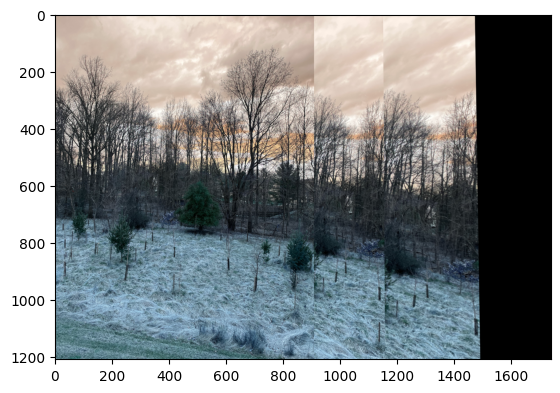

In [7]:

match123, keypoints12, keypoints3 = get_images(stich1,img3)
H2 = calculate_homography(match123,keypoints12,keypoints3)

img3 = cv.resize(img3, (int(img3.shape[1]*0.3),int(img3.shape[0]*0.3)), interpolation = cv.INTER_AREA)

stich2 = cv.warpPerspective(stich1,H1,((stich1.shape[1]+img3.shape[1]),max(stich1.shape[0],img3.shape[0])))
stich2[:img3.shape[0],:img3.shape[1]] = img3
stich2 = stich2[:,:1740]
print('H2 = ',H2)
plt.imshow(stich2)
plt.show()


H3 =  [[-6.52605436e-04 -6.82073323e-04  3.24319490e-01]
 [-3.43753373e-03 -6.88232247e-04  9.45939547e-01]
 [-4.30446808e-06 -1.79385362e-06  1.43554828e-03]]


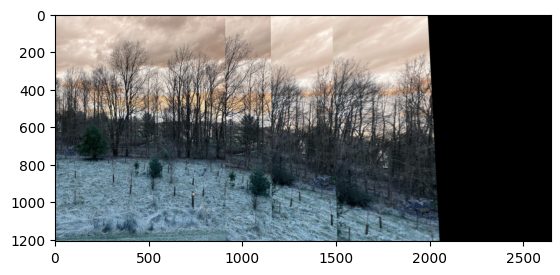

In [8]:

match1234, keypoints123, keypoints4 = get_images(stich2,img4)
H3 = calculate_homography(match1234,keypoints123,keypoints4)

img4 = cv.resize(img4, (int(img4.shape[1]*0.3),int(img4.shape[0]*0.3)), interpolation = cv.INTER_AREA)

stich3 = cv.warpPerspective(stich2,H1,((stich2.shape[1]+img4.shape[1]),max(stich2.shape[0],img4.shape[0])))
stich3[:img4.shape[0],:img4.shape[1]] = img4
print('H3 = ',H3)
plt.imshow(stich3)
plt.show()
